# 심화과제


Req-7. 명세서 9p의 내용을 따라 Face Detection을 하는 코드를 작성하고 실행해 보세요.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
!pip install face_recognition

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=6d37ad162fc74bf24820667c3824fe2eb8a5b04938503dfc3fb08539c1cf22fa
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [26]:
import cv2, os
import face_recognition as fr
from IPython.display import Image, display
from matplotlib import pyplot as plt

In [31]:
image_path = '/gdrive/My Drive/ColabNotebooks/gg01.jpg'

In [32]:
image = fr.load_image_file(image_path)
face_locations = fr.face_locations(image)

In [33]:
for (top, right, bottom, left) in face_locations:
    cv2.rectangle(image, (left, top), (right, bottom), (0,255,0), 3)

In [34]:
# 이미지 버퍼 출력
plt.rcParams["figure.figsize"] = (16,16)
plt.imshow(image)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Req-8. 명세서 12p를 참고하여 4명의 인물사진에서 얼굴을 감지하여 인코딩을 한 후 새로운 인물사진 unknown을 입력 받아 기존 4명의 얼굴 중 동일인을 찾는 코드를 구현 및 실행해 보세요.


In [64]:
plt.rcParams["figure.figsize"] = (1,1)

# 이미지 파일을 로드하여 known_person_list 리스트 생성
known_person_list = []
known_person_list.append(fr.load_image_file("/gdrive/My Drive/ColabNotebooks/person1.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/ColabNotebooks/person2.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/ColabNotebooks/person3.jpg"))
known_person_list.append(fr.load_image_file("/gdrive/My Drive/ColabNotebooks/person4.jpg"))

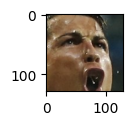

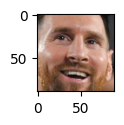

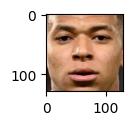

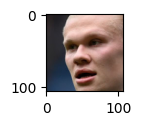

In [63]:
# 얼굴을 인식을 하여 감지된 부분을 잘라낸 다음 known_face_list에 저장
known_face_list = []
for person in known_person_list:

    # 얼굴좌표를 알아내서 잘라낸다
    top, right, bottom, left = fr.face_locations(person)[0]
    face_image = person[top:bottom, left:right]

    # known_face_list에 잘라낸 face_image를 저장
    known_face_list.append(face_image)

# known_face_list에 저장된 얼굴들 출력
for face in known_face_list:
    plt.imshow(face)
    plt.show()

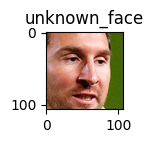

In [55]:
# 기존리스트에 없는 새로운 파일을 열어서
unknown_person = fr.load_image_file("/gdrive/My Drive/ColabNotebooks/unknown.jpg")

# 얼굴좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person)[0]
unknown_face = unknown_person[top:bottom, left:right]

# unknown_face 이라는 타이틀을 붙여서 표시
plt.title("unknown_face")
plt.imshow(unknown_face)
plt.show()

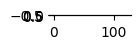

In [59]:
# 이미지에서 얼굴 위치 찾기
face_locations = fr.face_locations(unknown_person)

# 얼굴 위치를 기반으로 얼굴 인코딩
enc_unknown_face = fr.face_encodings(unknown_person, face_locations)

# 화면에 표시해보면 다음과 같다
plt.imshow(enc_unknown_face)
plt.show()

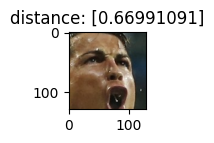

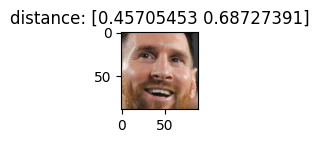

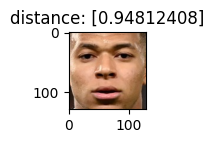

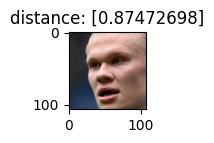

In [73]:
# 등록된 얼굴리스트를 비교
for i, person in enumerate(known_person_list):

    # 등록된 얼굴을 128-dimensional face 인코딩
    face_locations = fr.face_locations(person)

    # 얼굴 위치를 기반으로 얼굴 인코딩
    enc_known_face = fr.face_encodings(person, face_locations)

    # 등록된 얼굴과 새로운 얼굴의 distance를 얼기
    distance = fr.face_distance(enc_known_face, enc_unknown_face[0])

    # distance 수치를 포함한 얼굴 출력
    plt.title("distance: " + str(distance))
    plt.imshow(known_face_list[i])
    plt.show()

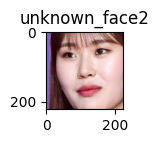

In [70]:
# 기존리스트에 없는 새로운 파일을 열어서
unknown_person2 = fr.load_image_file("/gdrive/My Drive/ColabNotebooks/unknown2.jpg")

# 얼굴좌표를 알아내서 잘라낸다
top, right, bottom, left = fr.face_locations(unknown_person2)[0]
unknown_face2 = unknown_person2[top:bottom, left:right]

# unknown_face 이라는 타이틀을 붙여서 표시
plt.title("unknown_face2")
plt.imshow(unknown_face2)
plt.show()

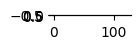

In [71]:
# 이미지에서 얼굴 위치 찾기
face_locations2 = fr.face_locations(unknown_person2)

# 얼굴 위치를 기반으로 얼굴 인코딩
enc_unknown_face2 = fr.face_encodings(unknown_person2, face_locations2)

# 화면에 표시해보면 다음과 같다
plt.imshow(enc_unknown_face2)
plt.show()

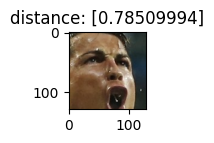

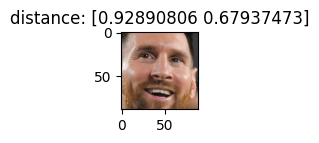

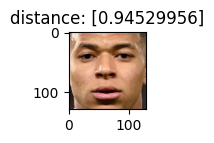

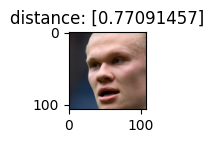

In [72]:
# 등록된 얼굴리스트를 비교
for i, person in enumerate(known_person_list):

    # 등록된 얼굴을 128-dimensional face 인코딩
    face_locations = fr.face_locations(person)

    # 얼굴 위치를 기반으로 얼굴 인코딩
    enc_known_face = fr.face_encodings(person, face_locations)

    # 등록된 얼굴과 새로운 얼굴의 distance를 얼기
    distance = fr.face_distance(enc_known_face, enc_unknown_face2[0])

    # distance 수치를 포함한 얼굴 출력
    plt.title("distance: " + str(distance))
    plt.imshow(known_face_list[i])
    plt.show()